# 신경망 추론
## 미니배치 버전 파이썬 구현

In [5]:
import numpy as np
W1 = np.random.rand(2,4) # x * W = h
np.sum(W1)/8 # W1의 평균 = 0.5에 수렴 -> np.random.rand generates 확률분포로 만드는 난수라고 알수있음

0.4839074815424985

In [6]:
print(W1)

[[0.23242726 0.7934232  0.94883295 0.01250601]
 [0.19543563 0.99885808 0.24771758 0.44205914]]


In [3]:

b1 = np.random.rand(4)

In [3]:
b1

array([0.34678728, 0.61796951, 0.59030361, 0.0663314 ])

In [4]:
x = np.random.rand(10,2) #10개 샘플 미니배치, 10개당 2개의 

In [5]:
x

array([[0.42698638, 0.26810132],
       [0.28683975, 0.05379772],
       [0.57096759, 0.69811541],
       [0.10601421, 0.73563676],
       [0.97296774, 0.90229574],
       [0.90768055, 0.90811135],
       [0.92880753, 0.85852122],
       [0.61641839, 0.10428316],
       [0.82351584, 0.51775292],
       [0.40415273, 0.32991406]])

In [6]:
h = np.matmul(x,W1)+b1

In [7]:
h

array([[0.42039671, 1.03542783, 1.08838379, 0.39569239],
       [0.38623506, 0.87682658, 0.80295637, 0.20347675],
       [0.4721094 , 1.23422502, 1.58422324, 0.73291143],
       [0.41804257, 0.83594188, 1.3599424 , 0.59366395],
       [0.53759218, 1.61901323, 2.00658973, 1.01087945],
       [0.53004361, 1.56318111, 1.97562508, 0.99169105],
       [0.52870865, 1.57309656, 1.93958409, 0.96612992],
       [0.43066353, 1.17231752, 1.0363572 , 0.35351288],
       [0.48880894, 1.42322402, 1.55158662, 0.70200887],
       [0.42249013, 1.02611538, 1.13526922, 0.42879012]])

In [8]:
h.shape

(10, 4)

## 시그모이드

In [6]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

200


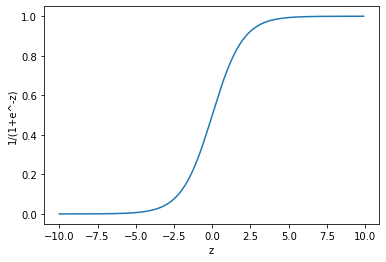

In [8]:
import matplotlib.pyplot as plt
import numpy as np
zs = np.arange(-10., 10., 0.1)
print(len(zs))
gs = [sigmoid(z) for z in zs]
plt.plot(zs, gs) # zs = x, gs = y
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [10]:
x = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)
W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

h = np.matmul(x, W1) + b1 # (10샘플 수,2특성 수)(2특성 수,4은닉 층 뉴런 수) + (4,바이어스=뉴런 수) => (10,4)
a = sigmoid(h) # activaton, 은닉층에 해당 h의 원소 값은 바뀌지 않기 떄문에 형상도 같음. 다만 모든 값이 0과 1 사이 수로 왜곡처리됨. 
s = np.matmul(a, W2) + b2 # 출력층 (10,4)(4,3) + (3,) => (10, 3) 10개의 샘플에 대한 각각 3개의 출력결과로 다중분류에서 사용됨.

In [11]:
h.shape

(10, 4)

In [12]:
a.shape

(10, 4)

In [13]:
s.shape

(10, 3)

In [33]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1/(1+np.exp(-x))
    
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out
    
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H) #(2, 4)
        b1 = np.random.randn(H) 
        W2 = np.random.randn(H, O) #(4, 3)
        b2 = np.random.randn(O)
        
        # Layer 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        #모든 가중치 리스트에 모음
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            print(self.params)
        
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [34]:
a = ['A', 'B']
a += ['C', 'D']

In [35]:
a

['A', 'B', 'C', 'D']

In [36]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
print(s.shape)

[array([[-0.05578711, -2.06603667, -0.44819438,  1.79136937],
       [-0.57842253, -0.9222392 ,  1.13159495,  1.06251565]]), array([-1.5276532 ,  0.39882092,  1.44525324,  0.58984659])]
[array([[-0.05578711, -2.06603667, -0.44819438,  1.79136937],
       [-0.57842253, -0.9222392 ,  1.13159495,  1.06251565]]), array([-1.5276532 ,  0.39882092,  1.44525324,  0.58984659])]
[array([[-0.05578711, -2.06603667, -0.44819438,  1.79136937],
       [-0.57842253, -0.9222392 ,  1.13159495,  1.06251565]]), array([-1.5276532 ,  0.39882092,  1.44525324,  0.58984659]), array([[-1.67888834,  0.84195851,  0.15037082],
       [ 1.17580487,  1.23231451, -0.03672695],
       [ 0.00990791,  0.7169247 , -0.67518087],
       [-0.9116178 ,  0.70165069,  0.76251473]]), array([0.61434089, 2.17740276, 0.12472012])]
(10, 3)
